**[Do not edit the contents of this cell]**

# MSc in Bioinformatics and Theoretical Systems Biology - Maths and Stats Assignment 2019/20

This assignment is to be completed in Python, R or Julia and returned as a Jupyter notebook or rendered pdf. 
There are 4 types of cells used in this notebook:
1. Cells containing tasks and instructions to be completed. Do not edit these. These are clearly labelled.
2. Cells in which you are meant to provide an answer in Markdown format.
3. Cells containing code that defines e.g. which packages to load, but can also contain routines and snippets of codes that you should use.
4. Cells that contain the Python/R/Julia code that you write to solve the problems set.

Each of these cells will contain explit comments at the top telling you whether to edit or not edit a cell. In Code cells comments are specified by the "#" character. In the Markdown Answer Cells, replace the xxx by your answer, whenever these are present. You will have to execute all code and Markdown cells in order to (i) make use of the provided code, and (ii) format the markdown appropriately.

There are three problems to be solved:
1. Data exploration [40%]
2. Hypothesis testing [30%]
3. Classification [30%]

For each questions there several parts of different difficulty. Where appropriate, further reading will be given at the start of each question.

You will have to specify which language (and version) you used and all packages needed in order to run all Code cells. Please add this information in the next two cells. You can also use a mix of languages but any change has to be clearly indicated in the appropriate cell.

The kernel for this Jupyter notebook is Python, version 3.6.2, with the following packages: pandas, numpy, matplotlib, scipy, sklearn and yellowbrick.

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from numpy import mean
from numpy import var
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ClassificationReport

**[Do not edit the contents of this cell]**

## Problem 1: data exploration

We consider a subset of data coming from a putative association study where researchers collected various metrics and phenotypes to find associations with a putative generic cardiovascular disease.
All recruited subjects are adults.
For each subject several predictor variables are recorded: sex, height (in cm), mass (in kg), whether is a smoker or not, her/his ethnicity, and levels of 5 different metabolites (labelled A-E).
Each subject has a unique ID number. 
For each subject a disease score, the response variable, measuring the severity of the disease phenotype in arbitrary units, is provided.
The data is provided in the file `association.csv`.

### Part 1

Load the dataset `association.csv`.
How many unique records of subjects do we have? How many unique predictor variables?

In [2]:
# Loading the dataset association.csv as a data frame using pandas
df = pd.read_csv("association.csv")

# Counting and printing the unique records of subjects
print("Unique records of subjects:", df['subject'].nunique())

# ID18 was twice in the dataset. Hence the duplicate should be removed from the data frame
df.drop_duplicates(subset = "subject", keep = 'first', inplace = True)

# Storing predictor variables (from column 'sex' to column 'metabolite_E') in a separate dataframe and counting them
predictors = df.loc[:, 'sex':'metabolite_E']
print("Unique predictor variables:", len(predictors.columns))

Unique records of subjects: 105
Unique predictor variables: 10


**[Provide your answer here]**
- The number of unique records of subjects in the dataset is: 105
- The number of variables in the dataset is: 10

**[Do not edit the contents of this cell]**

### Part 2

Produce a plot to illustrate the distribution of variables sex, mass, ethnicity, metabolite_A. Choose the most appropriate visualisation depending on the type of each variable.

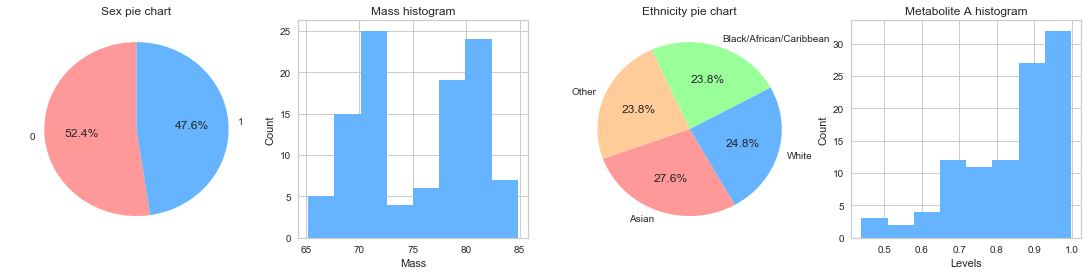

In [3]:
# Creating multiple subplots
fig, axes = plt.subplots(1, 4, figsize=(19,4))

# Plotting a pie chart for distribution of sex
colours = ['#ff9999','#66b3ff']
labels = df["sex"].value_counts().index
axes[0].pie(df["sex"].value_counts(), colors = colours, labels=labels, autopct='%1.1f%%', startangle = 90)
axes[0].set_title("Sex pie chart")
axes[0].set_xlabel(" ")
axes[0].set_ylabel(" ")

# Plotting histogram for mass
axes[1].hist(df["mass"], bins='auto', color = "#66b3ff")
axes[1].set_title("Mass histogram")
axes[1].set_xlabel("Mass")
axes[1].set_ylabel("Count")

# Plotting a pie chart for distribution of ethnicity
colours = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = df["ethnicity"].value_counts().index
axes[2].pie(df["ethnicity"].value_counts(), colors = colours, labels = labels, autopct='%1.1f%%', startangle = 200)
axes[2].set_title("Ethnicity pie chart")
axes[2].set_xlabel(" ")
axes[2].set_ylabel(" ")

# Plotting histogram for metabolite A
axes[3].hist(df["metabolite_A"].dropna(), bins='auto', color = "#66b3ff")
axes[3].set_title("Metabolite A histogram")
axes[3].set_xlabel("Levels")
axes[3].set_ylabel("Count")

# Demonstrating the plot
plt.show()

**[Do not edit the contents of this cell]**

### Part 3

Write a function that returns the Body Mass Index (BMI).Calculate BMI for each subject and add it as new variable in the data set.

In [4]:
# Calculating Body Mass Index (BMI)
def BMI(mass, height):
    bmi = (mass / (height ** 2)) * 10000
    return bmi

# Applying the BMI function with two arguments 'mass' and 'height' to create a new pandas column 'BMI'
df['BMI'] = np.vectorize(BMI)(df['mass'], df['height'])

**[Do not edit the contents of this cell]**

### Part 4

Calculate the correlation matrix between numerical predictors. Use this information to impute any missing values, if possible.

Correlation matrix between numerical predictors
              height    mass  metabolite_A  metabolite_B  metabolite_C  metabolite_D  metabolite_E     sex  smoker
height        1.0000 -0.0260        0.0015        0.0100        0.1687       -0.0308       -0.0072 -0.0602  0.0855
mass         -0.0260  1.0000       -0.0789       -0.0527       -0.0494        0.0801        0.0627 -0.9307 -0.0429
metabolite_A  0.0015 -0.0789        1.0000        0.9837       -0.0680       -0.1859       -0.1948  0.0764  0.0006
metabolite_B  0.0100 -0.0527        0.9837        1.0000       -0.0622       -0.1825       -0.1919  0.0539 -0.0004
metabolite_C  0.1687 -0.0494       -0.0680       -0.0622        1.0000        0.1140        0.1963  0.0913  0.1313
metabolite_D -0.0308  0.0801       -0.1859       -0.1825        0.1140        1.0000        0.9949 -0.0363  0.0449
metabolite_E -0.0072  0.0627       -0.1948       -0.1919        0.1963        0.9949        1.0000 -0.0216  0.0597
sex          -0.0602 -0.9307    

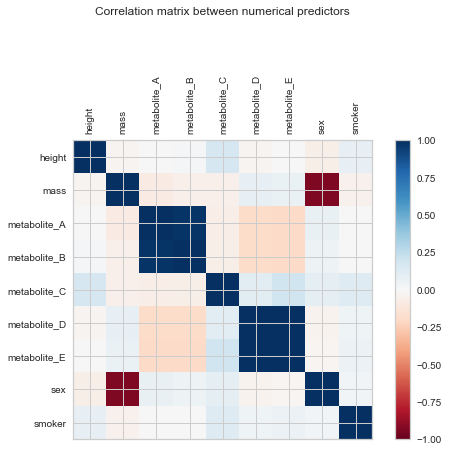


###############################################################################

High positive correlation has been observed between metabolites A and B, as well as between metabolites D and E.
Number of rows that contain missing values is (2,)
The missing values are for metabolite A for subjects ID23 and ID87.
The next step was the replacement the missing values for metabolite A with the values from metabolite B.


In [5]:
# Creating a new data frame with numerical predictors (ethnicity is excluded)
predictors_num = predictors[predictors.columns.difference(['ethnicity'])]

# Calculating the correlation matrix between numerical predictors
corr = predictors_num.corr()
print("Correlation matrix between numerical predictors")
print(round(corr, 4))

print("\n###############################################################################")

# Visualising of correlation between 'predictors' variables
fig1 = plt.figure()
ax = fig1.add_subplot(111)
cax = ax.matshow(corr, cmap = 'RdBu' , vmin = -1, vmax = 1)
fig1.colorbar(cax)
ticks = np.arange(0, len(predictors_num.columns), 1)
# Showing all the ticks
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.xticks(rotation = 90)
# Labelling the ticks with respect to their list entries
ax.set_xticklabels(predictors_num.columns)
ax.set_yticklabels(predictors_num.columns)
plt.title('Correlation matrix between numerical predictors', y = 1.40)
plt.show()

print("\n###############################################################################")

# Printing initial observations
print("\nHigh positive correlation has been observed between metabolites A and B, as well as between metabolites D and E.")
# Finding missing values
missing = df[df.isnull().any(axis = 1)]
print("Number of rows that contain missing values is", missing.shape[ :1])
print("The missing values are for metabolite A for subjects ID23 and ID87.")
print("The next step was the replacement the missing values for metabolite A with the values from metabolite B.")

# Replacing the missing values for metabolite A using the values from metabolite B based on the high correlation
def metBmetA(df, metA, metB):
    df[metA] = df[metA].fillna(value = df[metB])
    return df

# Calling the function metBmetA to replace the missing values of metabolite A
df = metBmetA(df, 'metabolite_A', 'metabolite_B')

**[Do not edit the contents of this cell]**

### Part 5

Assuming that a disease status is recorded when the disease score is greater than 5, add a new response variable in the dataset defining the diseases status of each subject.

In [6]:
# Create a new column called df.elderly where the value is 'yes' if disease score is greater than 5 and 'no' if not
df['disease_status'] = np.where(df['disease_score'] >= 5, 'yes', 'no')

**[Do not edit the contents of this cell]**

## Problem 2: hypothesis testing

Starting from the same dataset in Problem 1, provide answers for the following questions.

### Part 1

Given this sample space of subjects, what is the probability that a given subject is diagnosed as diseased? What is the probability that a subject is diagnosed as diseased given that he/she is not a smoker?

In [7]:
# Assuming the '1' in a 'smoker' variable stands for a smoker, while '0' - for a non-smoker
# Calculating the probabilities for a diseased status
print('Probabilitiy of a subject being diseased/not diseased')
diseased_probs = df.groupby('disease_status').size().div(len(df))
print("\n", round(diseased_probs, 4))

# Calculating the probabilities for a smoker status
# print('\nProbabilitiy of a subject being a smoker/non-smoker')
smoker_probs = df.groupby('smoker').size().div(len(df))

print("\n###############################################################################")

# Calculating the probabilities for different combinations of being diseased while given that the subject is a non-smoker
print('\nProbabilitiy of a subject being diseased/not diseased as given that the subject is a smoker/non-smoker')
diseased_and_non_smoker = df.groupby(['smoker', 'disease_status']).size().div(len(df)).div(smoker_probs, level = 'smoker')
print("\n", round(diseased_and_non_smoker, 4)) 

Probabilitiy of a subject being diseased/not diseased

 disease_status
no     0.8667
yes    0.1333
dtype: float64

###############################################################################

Probabilitiy of a subject being diseased/not diseased as given that the subject is a smoker/non-smoker

 smoker  disease_status
0       no                0.9136
        yes               0.0864
1       no                0.7083
        yes               0.2917
dtype: float64


**[Provide your answer here]**
- The probability that a subject is diseased is: 0.1333 (4 d.p.)
- The probability that a subject is diseased given that she/he is not a smoker is: 0.0864 (4 d.p.)

**[Do not edit the contents of this cell]**

### Part 2

Assuming that they are Normally distributed, estimate mean and variance for the distributions of height and mass separately for males and females. Use **either** a frequentist **or** likelihoodist **or** Bayesian approach.

In [8]:
# Storing sex 0 and sex 1 in separate data frames
sex0 = df[df.sex == 0]
sex1 = df[df.sex == 1]

# Creating the table for the means for the distributions of height and mass for sex = 0 and sex = 1 
# The likelihoodist approach
means = pd.DataFrame(index=["0", "1"])

for var1 in ['mass', 'height']:
    means[var1] = sex0[var1].mean(), sex1[var1].mean()

print("\nMeans for the distributions of height and mass for sex = 0 and sex = 1")
print("\n", round(means, 4))

print("\n###############################################################################")

# Creating the table for the variances for the distributions of height and mass for sex = 0 and sex = 1 
# The likelihoodist approach
variances = pd.DataFrame(index=["0", "1"])

for var2 in ['mass', 'height']:
    variances[var2] = sex0[var2].var(ddof = 0), sex1[var2].var(ddof = 0)

print("\nVariances for the distributions of height and mass for sex = 0 and sex = 1")
print("\n", round(variances, 4))


Means for the distributions of height and mass for sex = 0 and sex = 1

       mass    height
0  80.1069  178.7711
1  70.3303  178.1819

###############################################################################

Variances for the distributions of height and mass for sex = 0 and sex = 1

      mass   height
0  3.4240  26.5388
1  3.9723  20.7490


**[Do not edit the contents of this cell]**

### Part 3

Test whether height is different between males and females. Perform the same test on the mass variable. Define (in words) which ones are your null and alternative hypotheses and significance threshold. Finally, discuss (in words) any conclusion you can make out the results of your statistical tests.

In [9]:
# Assuming that all variables are normally distributed
print("Testing the difference in height distributions between sex = 0 and sex = 1")
# Levene's test was used as a first step to test the equality of variances for heights of sex 0 and sex 1
# Separating heights of sex 0 and 1
heights0 = sex0.height
heights1 = sex1.height
print(stats.levene(heights0.dropna(), heights1.dropna()))
print("As p = 0.5637 (4 d.p.) is greater than 0.05 then the data set conforms to the equal of variances criterion.")

# Applying t-test
print("\nNull hypothesis H0: height mean of sex 0 = height mean of sex 1")
print("Alternative hypothesis H1: height mean of sex 0 != height mean of sex 1")
# Creating the table for the t-test
test1 = pd.DataFrame(index=["t-statistic", "p-value"])
for val in ['height']:
    test1[val] = stats.ttest_ind(sex0[val], sex1[val])                         
print("\nT-test of the height distributions between sex = 0 and sex = 1")
print("\n", round(test1, 4))
                                                
# Interpretation of the outcome
print("\np = 0.5416 (4 d.p.) is greater than the significance threshold of 0.05.")
print("Not significant, this means that the null hypothesis should not be rejected in favour of the alternative hypothesis.")
print("There is no difference in mean heights of sexes 0 and 1.")

print("\n###############################################################################")

print("\nTesting the difference in mass distributions between sex = 0 and sex = 1")
# Levene's test was used as a first step to test the equality of variances for masses of sex 0 and sex 1
# Separating masses of sex 0 and 1
mass0 = sex0.mass
mass1 = sex1.mass
print(stats.levene(mass0.dropna(), mass1.dropna()))
print("As p = 0.6996 (4 d.p.) is greater than 0.05 then the data set conforms to the equal of variances criterion.")

# Applying t-test
print("\nNull hypothesis H0: mass mean of sex 0 = mass mean of sex 1")
print("Alternative hypothesis H1: mass mean of sex 0 != mass mean of sex 1")
# Creating the table for the t-test
test2 = pd.DataFrame(index=["t-statistic", "p-value"])
for val in ['mass']:
    test2[val] = stats.ttest_ind(sex0[val], sex1[val])                                  
print("\nT-test of the height distributions between sex = 0 and sex = 1")
print("\n", round(test2, 4))

# Interpretation of the outcome
print("\np-value is less than the significance threshold of 0.05.")
print("Significant, this means that the null hypothesis should be rejected in favour of the alternative hypothesis.")
print("There is a difference in mean masses of sexes 0 and 1.")

Testing the difference in height distributions between sex = 0 and sex = 1
LeveneResult(statistic=0.33546458861621825, pvalue=0.56372349332044625)
As p = 0.5637 (4 d.p.) is greater than 0.05 then the data set conforms to the equal of variances criterion.

Null hypothesis H0: height mean of sex 0 = height mean of sex 1
Alternative hypothesis H1: height mean of sex 0 != height mean of sex 1

T-test of the height distributions between sex = 0 and sex = 1

              height
t-statistic  0.6124
p-value      0.5416

p = 0.5416 (4 d.p.) is greater than the significance threshold of 0.05.
Not significant, this means that the null hypothesis should not be rejected in favour of the alternative hypothesis.
There is no difference in mean heights of sexes 0 and 1.

###############################################################################

Testing the difference in mass distributions between sex = 0 and sex = 1
LeveneResult(statistic=0.14973547620417718, pvalue=0.69958661361336127)
As p = 0

**[Provide your answer here]**


**[Do not edit the contents of this cell]**

### Part 4

Repeat the statistical test in Part 3 for all numerical predictor variables in the dataset. How many tests are significant with $\alpha=0.05$?
Calculate corrected p-values for multiple tests using a Bonferroni correction. How many tests are significant now? 

In [10]:
# Assuming that all variables are normally distributed
# Dropping off sex and smoker from numerical predictor variables. Height and mass were omitted to avoid repetition
predictors_num1 = predictors_num[predictors_num.columns.difference(['sex','smoker'])]
# Adding disease score and BMI into a data frame
predictors_num1['disease_score'] = df['disease_score']
predictors_num1['BMI'] = df['BMI']

# Creating the tables for levene's test and t-test
lev_test = pd.DataFrame(index=["t-stat", "p-value"])
t_test = pd.DataFrame(index=["t-stat", "p-value"])

# Performing Levene's test as a first step to test the equality of variances for numerical variables of sex 0 and sex 1
for pred1 in predictors_num1:
    lev_test[pred1] = stats.levene(sex0[pred1], sex1[pred1])

print("\nLevene's test for all numerical predictor variables in the dataset")
print("\n", round(lev_test, 4))
print("\np-values for all tests were greater than the signiificance threshold of 0.05 meeting the variances criterion.")

print("\n###############################################################################")

# Applying t-test
for pred2 in predictors_num1:
    t_test[pred2] = stats.ttest_ind(sex0[pred2], sex1[pred2])

print("\nThe statistical test for all numerical predictor variables in the dataset")
print("\n", round(t_test, 4))

print("\n###############################################################################")

# Interpretation of the results
print("\nTwo tests (mass and BMI) were significant with  𝛼 = 0.05: mass and BMI.")

print("\n###############################################################################")

# Bonferroni correction to protect from Type I Error
alpha = 0.05
number_tests = 9
bonferroni = alpha / number_tests
print("\nBonferroni adjusted p value to 4 d.p.:", round(bonferroni, 4))

print("\n###############################################################################")

# Interpretation of the results with an adjusted p-value
print("\nTwo tests (mass and BMI) were significant with  𝛼 altered = 0.0056 (4 d.p): mass and BMI.")


Levene's test for all numerical predictor variables in the dataset

          height    mass  metabolite_A  metabolite_B  metabolite_C  metabolite_D  metabolite_E  disease_score     BMI
t-stat   0.3355  0.1497        0.0413        0.7395        0.6454        0.2628        0.0917         0.6536  2.6682
p-value  0.5637  0.6996        0.8394        0.3918        0.4236        0.6093        0.7627         0.4207  0.1054

p-values for all tests were greater than the signiificance threshold of 0.05 meeting the variances criterion.

###############################################################################

The statistical test for all numerical predictor variables in the dataset

          height     mass  metabolite_A  metabolite_B  metabolite_C  metabolite_D  metabolite_E  disease_score     BMI
t-stat   0.6124  25.8144       -1.4818       -0.5478        -0.931        0.3682        0.2194         0.0568  9.3427
p-value  0.5416   0.0000        0.1414        0.5850         0.354        

**[Do not edit the contents of this cell]**

## Problem 3: classification

### Part 1

Implement an algorithm to predict the disease status of a subject given all response variables provided in the dataset. You are free to choose the appropriate statistical tool you prefer. Assess the quality of your classifier.

In [11]:
# Encoding 'ethnicity' and 'disease_status' variables
cleanup = {"ethnicity":     {"Asian": 1, "Black/African/Caribbean": 2, 'White': 3, 'Other':4},
                "disease_status": {"no": 0, "yes": 1}}
df.replace(cleanup, inplace=True)

Accuracy

             Gaussian Naive Bayes  Linear Support Vector
Test set                0.976190               0.869048
Target set              0.904762               0.857143

###############################################################################


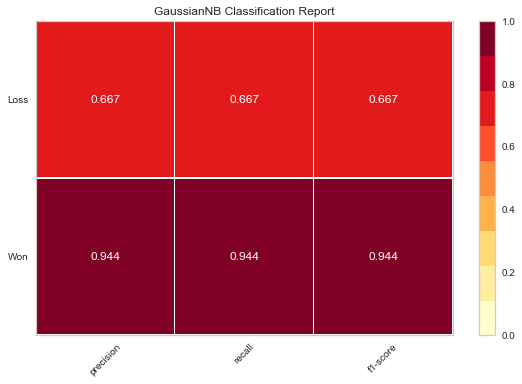


###############################################################################

The decision was made to proceed with the Gaussian Naive Bayes algorithm.


In [12]:
# Separating the features and target variables
# Picking columns other than 'subject' and 'disease_status'
cols = [col for col in df if col not in ['subject','disease_status']]
# Removing the 'subject' and 'disease_status' columns and making a new data frame called 'data' without those two variables
data = df[cols]
# Removing the 'BMI' and 'disease_score' columns
data = df[data.columns.difference(['BMI', 'disease_score'])]
# Creating the 'disease_status' column that will be the target variable
target = df['disease_status']

# Splitting data and target into training and testing sets: 80% : 20%
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size = 0.20, random_state = 42)

# Employing the Naive Bayes and Linear SVC algorithms based on the nature of the task (classification) and the provided data
# Storing accuracy results for test set and target set in a table
accuracy = pd.DataFrame(index=["Test set", "Target set"])
# Implementing Gaussian Naive Bayes algorithm
gnb = GaussianNB()
trained_model = gnb.fit(data_train, target_train)
trained_model.fit(data_train, target_train)
predictions = trained_model.predict(data_test)
accuracy["Gaussian Naive Bayes"] = [accuracy_score(target_train, trained_model.predict(data_train), normalize = True), 
                                    accuracy_score(target_test, predictions, normalize = True)]

# Implementing Linear Support Vector Classification
svc = LinearSVC(random_state=0)
trained_model = svc.fit(data_train, target_train)
trained_model.fit(data_train, target_train)
predictions = trained_model.predict(data_test)
accuracy["Linear Support Vector"] = [accuracy_score(target_train, trained_model.predict(data_train), normalize = True), 
                                    accuracy_score(target_test, predictions, normalize = True)]
print("Accuracy")
print("\n", accuracy)

print("\n###############################################################################")

# Visualising the classification report for the Gaussian Naive Bayes algorithm
visualiser = ClassificationReport(gnb, classes=['Won', 'Loss'])
visualiser.fit(data_train, target_train)
visualiser.score(data_test, target_test) 
graph1 = visualiser.poof()

print("\n###############################################################################")

print("\nThe decision was made to proceed with the Gaussian Naive Bayes algorithm.")

**[Do not edit the contents of this cell]**

### Part 2

Given the classifier you devised in Part 1, predict the disease status of the following subject:
- subject: ID986
- sex: 1
- height: 180.2
- mass: 70.1
- smoker: 1
- ethnicity: "White"
- metabolite_A: 0.5
- metabolite_B: 1.2
- metabolite_C: 0.5
- metabolite_D: 8.5
- metabolite_E: 10.2

In [13]:
subject_data = {"sex": 1, "height": 180.2, "mass": 70.1, "smoker": 1, "ethnicity": '3', 
                "metabolite_A": 0.5, "metabolite_B": 1.2, "metabolite_C": 0.5, "metabolite_D": 8.5, "metabolite_E": 10.2}

subject = pd.DataFrame(columns = data.columns)
subject_data_test = subject.append(subject_data, ignore_index=True)

print("The predicted disease status of", gnb.predict(subject_data_test), "indicates that the subject is diseased.")

The predicted disease status of [1] indicates that the subject is diseased.
